MAKING A DATAFRAME

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759565 sha256=1b51e7fd8d4804b07ad966d141203100caf324dc643c67b7861bea69c5043984
  Stored in directory: /tmp/pip-ephem-wheel-cache-fw6f5yc0/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
from pylab import rcParams
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import linkage, cut_tree
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [32]:
z = pd.read_pickle("/content/drive/MyDrive/CHINA_DATASET/brofinalll.plk")

In [33]:
z.head()

,station,real_dates,pm25,latitude,longitude,states
0,"Adarsh Nagar, Jaipur - RSPCB",2018-01-01,61.342917,26.902909,75.836858,Rajasthan
1,"Adarsh Nagar, Jaipur - RSPCB",2018-01-02,68.528125,26.902909,75.836858,Rajasthan
2,"Adarsh Nagar, Jaipur - RSPCB",2018-01-03,88.325833,26.902909,75.836858,Rajasthan
3,"Adarsh Nagar, Jaipur - RSPCB",2018-01-04,68.783983,26.902909,75.836858,Rajasthan
4,"Adarsh Nagar, Jaipur - RSPCB",2018-01-05,63.135110,26.902909,75.836858,Rajasthan


In [34]:
z['year'] = [d.year for d in z.real_dates]
z['month'] = [d.strftime('%b') for d in z.real_dates]

In [39]:
p =z.groupby(['station','year'], as_index=False)['pm25'].mean()
p = p.sort_values(by=["year"])
lat_lon = pd.read_excel("/content/drive/MyDrive/CHINA_INDIA_VARIABLES/states_latitude_longitude.xlsx")
latitude = []
longitude = []
states = []
for i in p['station']:
  for j in range(len(lat_lon['station_name'])):
    if lat_lon['station_name'][j] == i: 
      states.append(lat_lon["State"][j])
      latitude.append(lat_lon["latitude"][j])
      longitude.append(lat_lon["longitude"][j])
p["latitude"] = latitude
p["longitude"]= longitude
p["state"] = states
p=p[p["year"]==2020]

WEIGHTED K-MEANS clustering

reference  :- 1) https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d

2) https://zerowithdot.com/weighted-k-means-clustering-example/

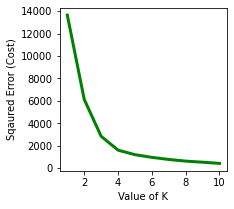

In [40]:
X = p[['latitude', 'longitude']]
weights = p['pm25'].copy()
cost =[]
for i in range(1, 11):
	KM = KMeans(n_clusters = i, max_iter = 500)
	KM.fit(X,sample_weight=weights)
	cost.append(KM.inertia_)	
  # print(f'Silhouette Score(n=2): {silhouette_score(X, cos)}'
plt.figure(figsize=(3, 3))
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
# plt.figure(figsize=(3, 3))
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.savefig("x1.png")
plt.show() # clear the plot



In [9]:
X = p[['latitude', 'longitude']]
weights = p['pm25'].copy()
for i in [2,3,4,5,6,7]:
      label = KMeans(n_clusters=i).fit_predict(X,
    sample_weight=weights)
      print(f'Silhouette Score(n=2): {silhouette_score(X, label)}')

Silhouette Score(n=2): 0.5613387579778765
Silhouette Score(n=2): 0.6364305387674951
Silhouette Score(n=2): 0.6433358626988813
Silhouette Score(n=2): 0.6168697965762084
Silhouette Score(n=2): 0.6140285136148103
Silhouette Score(n=2): 0.6167162213705215


In [10]:
label = KMeans(n_clusters=4).fit_predict(X,
    sample_weight=weights)
p["label"]=label
print(f'Silhouette Score(n=4): {silhouette_score(X, label)}')

Silhouette Score(n=4): 0.6433358626988813


In [11]:
davies_bouldin_score(X,p['label'])

0.5392999745971878

In [ ]:
r = p[["latitude","longitude","label"]]
r.to_excel("/content/drive/MyDrive/NEW_RESULTS/k_means_2020.xlsx")

In [27]:
y = [] 
for i in p['label']:
  if i==0:
    y.append("blue")
  elif i==1:
    y.append("green")
  elif i==2:
    y.append("yellow")
  elif i==3:
    y.append("violet")
  elif i==4:
    y.append("red")
  elif i==5:
    y.append("pink")
  elif i==6:
    y.append("gray")
  elif i==7:
    y.append("purple")
p["color"]=y

In [28]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(p[p['pm25']>0].index)):
    folium.Circle(
        location=[p.iloc[i]['latitude'],p.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ p.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(p.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(p.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(p.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=p.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

DBSCAN

Reference :- https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d

In [ ]:
llon =  67
llat =  8
ulon =  98
ulat =  39
my_map = Basemap(projection = 'merc',resolution='l',area_thresh=1000.0,llcrnrlat=llat,llcrnrlon=llon,urcrnrlat=ulat,urcrnrlon=ulon)
xs,ys = my_map(np.asarray(p.longitude),np.asarray(p.latitude))
p['xm'] = xs.tolist()
p['ym'] = ys.tolist()
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
w = p[['pm25','xm','ym']]
w = StandardScaler().fit_transform(w)
db = DBSCAN(eps=0.5,min_samples=4).fit(w)
labels = db.labels_
p['label'] = labels

In [ ]:
print(f'Silhouette Score(n=4): {silhouette_score(w, labels)}')

Silhouette Score(n=4): 0.13033095615187193


In [ ]:
davies_bouldin_score(w, labels)

1.4579267516715846

In [ ]:
r = p[["latitude","longitude","label"]]
r.to_excel("/content/drive/MyDrive/NEW_RESULTS/dbscan_2020.xlsx")

In [ ]:
y = [] 
for i in p['label']:
  if i==-1:
    y.append("black")
  elif i==0:
    y.append("blue")
  elif i==1:
    y.append("green")
  elif i==2:
    y.append("yellow")
  elif i==3:
    y.append("violet")
  elif i==4:
    y.append("red")
  elif i==5:
    y.append("pink")
  elif i==6:
    y.append("gray")
  elif i==7:
    y.append("purple")
  elif i==8:
    y.append("skyblue")
  else:
    y.append("white")
p["color"] = y

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(p[p['pm25']>0].index)):
    folium.Circle(
        location=[p.iloc[i]['latitude'],p.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ p.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(p.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(p.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(p.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=p.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

spectral clustering 
reference :- https://www.kaggle.com/vipulgandhi/spectral-clustering-detailed-explanation

Silhouette Score(n=4): 0.6105099389527626
Silhouette Score(n=4): 0.5304869127672618
Silhouette Score(n=4): 0.5137404852740746
Silhouette Score(n=4): 0.5078283933375138
Silhouette Score(n=4): 0.4904983031708768
Silhouette Score(n=4): 0.46404477109607895


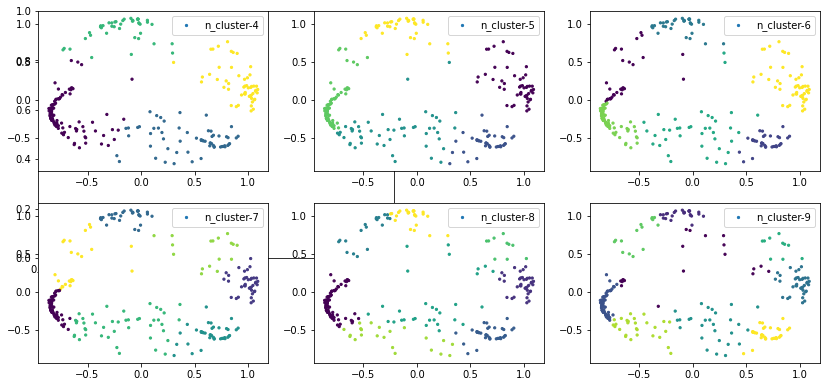

<Figure size 432x432 with 0 Axes>

In [20]:
f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(4, 10):
 sc = SpectralClustering(n_clusters=i).fit(X_principal)
 labels_rbf = sc.fit_predict(X_principal)
 print(f'Silhouette Score(n=4): {silhouette_score(X_principal, labels_rbf)}')
 f.add_subplot(3, 3, i-3)
 plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
 plt.legend()
plt.figure(figsize=(6, 6))
plt.savefig("x2.png")
plt.show() 

In [16]:
X = p[['latitude','longitude',"pm25"]]
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
p['label'] = labels_rbf


In [ ]:

print(f'Silhouette Score(n=4): {silhouette_score(X_principal, labels_rbf)}')

Silhouette Score(n=4): 0.6105099389527626


In [ ]:
davies_bouldin_score(X_principal, labels_rbf)

0.611456458942744

In [ ]:
r = p[["latitude","longitude","label"]]
r.to_excel("/content/drive/MyDrive/NEW_RESULTS/spectral_clustering_2019.xlsx")

In [ ]:
y = [] 
for i in p['label']:
  if i==9:
    y.append("black")
  elif i==0:
    y.append("blue")
  elif i==1:
    y.append("green")
  elif i==2:
    y.append("yellow")
  elif i==3:
    y.append("violet")
  elif i==4:
    y.append("red")
  elif i==5:
    y.append("pink")
  elif i==6:
    y.append("gray")
  elif i==7:
    y.append("purple")
  elif i==8:
    y.append("skyblue")
  else:
    y.append("white")
p["color"] = y

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(p[p['pm25']>0].index)):
    folium.Circle(
        location=[p.iloc[i]['latitude'],p.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ p.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(p.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(p.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(p.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=p.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

hierarchical clustering
reference :- https://stackoverflow.com/questions/45025056/how-to-perform-cluster-with-weights-density-in-python-something-like-kmeans-wit

In [21]:
def custom_metric(central_1, central_2, weight=1):
    lat1, lng1, pow1 = central_1
    lat2, lng2, pow2 = central_2

    lat1, lat2, lng1, lng2 = np.deg2rad(np.asarray([lat1, lat2, lng1, lng2]))

    dlat = lat2 - lat1
    dlng = lng2 - lng1
    
    h = (1 - np.cos(dlat))/2. + np.cos(lat1)*np.cos(lat2)*(1 - np.cos(dlng))/2.
    km = 2*6371*np.arcsin(np.sqrt(h))
    
    MW = np.abs(pow2 - pow1)
    
    return km + weight*MW

data = np.vstack([p.latitude, p.longitude, p.pm25]).T
Z = linkage(data, method='average', metric=custom_metric)
y = cut_tree(Z, 4).flatten()

Silhouette Score(n=4): 0.09941965087758196


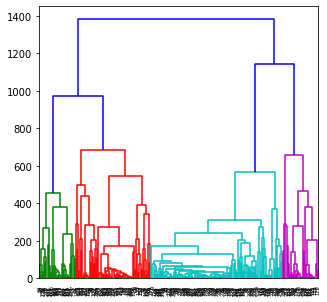

In [24]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(5, 5))
dendrogram(Z)
plt.savefig("x3.png")
print(f'Silhouette Score(n=4): {silhouette_score(data,y)}')

In [ ]:
davies_bouldin_score(data,y)

3.0291708747796844

In [ ]:
p['label'] = y
y = [] 
for i in p['label']:
  if i==9:
    y.append("black")
  elif i==0:
    y.append("blue")
  elif i==1:
    y.append("green")
  elif i==2:
    y.append("yellow")
  elif i==3:
    y.append("violet")
  elif i==4:
    y.append("red")
  elif i==5:
    y.append("pink")
  elif i==6:
    y.append("gray")
  elif i==7:
    y.append("purple")
  elif i==8:
    y.append("skyblue")
  else:
    y.append("white")
p["color"] = y

In [ ]:
r = p[["latitude","longitude","label"]]
r.to_excel("/content/drive/MyDrive/NEW_RESULTS/hierarchical_clustering_2019.xlsx")

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(p[p['pm25']>0].index)):
    folium.Circle(
        location=[p.iloc[i]['latitude'],p.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ p.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(p.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(p.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(p.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=p.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india